In [127]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib
#Importing Important libraries
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
from haversine import haversine
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [128]:
import os
# We initialise the function to read data as required.
# If we pass train.csv in dataSet, we get the training data and if we pass train.csv in dataSet, we get the testing data.
def loadData(dataSet):
    dataPath = os.path.join("data", "")
    csvPath = os.path.join(dataPath, dataSet)
    return pd.read_csv(csvPath)

In [129]:
trainingData = loadData("train.csv")
trainingData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [130]:
testingData = loadData("test.csv")
testingData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


Mean trip duration is: 6.4645211752676754


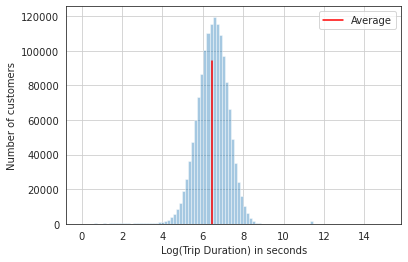

In [131]:
# Here we add a new column named log_trip_duration which is simply the log of trip duration in base 10.
# The plot below shows the log_trip_duration plotted against the number of customers
# As you can clearly see by the red line, the meanTrip duration (in log) is 6.46.
trainingData['log_trip_duration'] = np.log(trainingData['trip_duration'].values)
meanTripDuration = trainingData.log_trip_duration.mean()
print("Mean trip duration is: " + str(meanTripDuration))
with sns.axes_style("white"): 
    trainingData.log_trip_duration.hist(bins=100, alpha=0.4)
    plt.axvline(meanTripDuration, 0, 0.75, color="red", label="Average")
    plt.xlabel("Log(Trip Duration) in seconds")
    plt.ylabel("Number of customers")
    plt.legend()

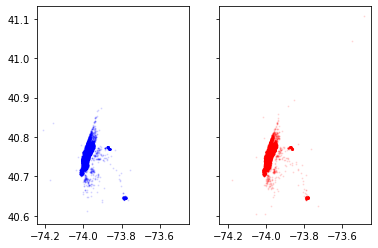

In [132]:
N = 10000
city_long_border = (-75, -75)
city_lat_border = (40, 40)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(trainingData["pickup_longitude"].values[:N],
             trainingData["pickup_latitude"].values[:N],
             color="blue", s=1, label="Training Data", alpha=0.1)

ax[1].scatter(testingData["pickup_longitude"].values[:N],
             testingData["pickup_latitude"].values[:N],
             color="red", s=1, label="Training Data", alpha=0.1)

In [133]:
# Lets check for null values in our data. If the data contains any null values, then while training these might cause error.
# Luckily, our data has no entries which are null and hence we don't need to clean it up.
trainingData.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
log_trip_duration     0
dtype: int64

In [134]:
testingData.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [135]:
# This is our training label column. Since we are using supervised learning for this assignment,
# the label will be what we will predict in our testing data.
# trainingLabel = trainingData.pop('trip_duration')

In [136]:
#trainingLabel

In [137]:
# We change the date time and drop time features in our data to type datetime to make it easier for us to manipulate it.
trainingData["pickup_datetime"] = pd.to_datetime(trainingData["pickup_datetime"])
trainingData["dropoff_datetime"] = pd.to_datetime(trainingData["dropoff_datetime"])
# Similarly for the testing data
testingData["pickup_datetime"] = pd.to_datetime(testingData["pickup_datetime"])

In [138]:
trainingData["weekday"] = trainingData.pickup_datetime.dt.day_name()
trainingData["weekdayNum"] = trainingData.pickup_datetime.dt.weekday
trainingData["month"] = trainingData.pickup_datetime.dt.month
trainingData["pickupHour"] = trainingData.pickup_datetime.dt.hour

testingData["weekday"] = testingData.pickup_datetime.dt.day_name()
testingData["weekdayNum"] = testingData.pickup_datetime.dt.weekday
testingData["month"] = testingData.pickup_datetime.dt.month
testingData["pickupHour"] = testingData.pickup_datetime.dt.hour

In [139]:
trainingData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,weekdayNum,month,pickupHour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297,Monday,0,3,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.496775,Sunday,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661056,Tuesday,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.061457,Wednesday,2,4,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.075346,Saturday,5,3,13


In [140]:
# Distance function to get the distance between two places.
def distance(dataSet):
    pickuploc = (dataSet["pickup_latitude"], dataSet["pickup_longitude"])
    dropoffloc = (dataSet["dropoff_latitude"], dataSet["dropoff_longitude"])
    return haversine(pickuploc, dropoffloc)

In [141]:
# We add this distance to the training data as a new coloumn for every ride. 
# this will help up to make better predictions using more features
trainingData["distance"] = trainingData.apply(lambda x: distance(x) , axis = 1)

In [142]:
trainingData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,weekdayNum,month,pickupHour,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297,Monday,0,3,17,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.496775,Sunday,6,6,0,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661056,Tuesday,1,1,11,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.061457,Wednesday,2,4,19,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.075346,Saturday,5,3,13,1.188590


In [143]:
# Similarly we add distance column to the testingData to help make predictions. 
testingData["distance"] = testingData.apply(lambda x: distance(x) , axis = 1)

In [144]:
testingData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,weekdayNum,month,pickupHour,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,Thursday,3,6,23,2.746430
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,Thursday,3,6,23,2.759243
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,Thursday,3,6,23,1.306157
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,Thursday,3,6,23,5.269095
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,Thursday,3,6,23,0.960843


In [145]:
trainingData.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [146]:
dummyValue = pd.get_dummies(trainingData.store_and_fwd_flag, prefix="flag")
dummyValue.drop(dummyValue.columns[0], axis=1, inplace=True)
trainingData = pd.concat([trainingData, dummyValue], axis = 1)

dummyValue = pd.get_dummies(trainingData.vendor_id, prefix="vendor_id")
dummyValue.drop(dummyValue.columns[0], axis=1, inplace=True)
trainingData = pd.concat([trainingData, dummyValue], axis = 1)

dummyValue = pd.get_dummies(trainingData.passenger_count, prefix="passenger_count")
dummyValue.drop(dummyValue.columns[0], axis=1, inplace=True)
trainingData = pd.concat([trainingData, dummyValue], axis = 1)

dummyValue = pd.get_dummies(trainingData.pickupHour, prefix="pickupHour")
dummyValue.drop(dummyValue.columns[0], axis=1, inplace=True)
trainingData = pd.concat([trainingData, dummyValue], axis = 1)

dummyValue = pd.get_dummies(trainingData.month, prefix="month")
dummyValue.drop(dummyValue.columns[0], axis=1, inplace=True)
trainingData = pd.concat([trainingData, dummyValue], axis = 1)

dummyValue = pd.get_dummies(trainingData.weekdayNum, prefix="weekdayNum")
dummyValue.drop(dummyValue.columns[0], axis=1, inplace=True)
trainingData = pd.concat([trainingData, dummyValue], axis = 1)

In [147]:
trainingData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,weekdayNum,month,pickupHour,distance,flag_Y,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9,pickupHour_1,pickupHour_2,pickupHour_3,pickupHour_4,pickupHour_5,pickupHour_6,pickupHour_7,pickupHour_8,pickupHour_9,pickupHour_10,pickupHour_11,pickupHour_12,pickupHour_13,pickupHour_14,pickupHour_15,pickupHour_16,pickupHour_17,pickupHour_18,pickupHour_19,pickupHour_20,pickupHour_21,pickupHour_22,pickupHour_23,month_2,month_3,month_4,month_5,month_6,weekdayNum_1,weekdayNum_2,weekdayNum_3,weekdayNum_4,weekdayNum_5,weekdayNum_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297,Monday,0,3,17,1.498523,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.496775,Sunday,6,6,0,1.805510,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661056,Tuesday,1,1,11,6.385107,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.061457,Wednesday,2,4,19,1.485500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.075346,Saturday,5,3,13,1.188590,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [148]:
trainingData.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [149]:
trainingData.passenger_count.describe()

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [150]:
# Since the average value of passenger is equal to 1 then lets change the values which are zero to 1 since having 0 
# 0 passenger in a taxi and doing a trip is physically impossible. Further more there are only 60 0 values
# in a data set of 1.4 million values so changing them won't have much effect.
trainingData["passenger_count"] = trainingData.passenger_count.map(lambda x: 1 if x == 0 else x)

In [151]:
trainingData.passenger_count.value_counts()

1    1033600
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

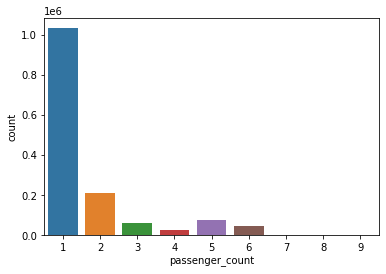

In [152]:
sns.countplot(trainingData.passenger_count)

In [154]:
# Lets see the trips which have more than 24 hrs of travelling time. Since there will be very few,
# it will be safe to remove them from the data as they are outliers and it won't be helpful to take
# them into consideration.
trainingData[trainingData.trip_duration >= 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,weekdayNum,month,pickupHour,distance,flag_Y,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9,pickupHour_1,pickupHour_2,pickupHour_3,pickupHour_4,pickupHour_5,pickupHour_6,pickupHour_7,pickupHour_8,pickupHour_9,pickupHour_10,pickupHour_11,pickupHour_12,pickupHour_13,pickupHour_14,pickupHour_15,pickupHour_16,pickupHour_17,pickupHour_18,pickupHour_19,pickupHour_20,pickupHour_21,pickupHour_22,pickupHour_23,month_2,month_3,month_4,month_5,month_6,weekdayNum_1,weekdayNum_2,weekdayNum_3,weekdayNum_4,weekdayNum_5,weekdayNum_6
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,14.478062,Tuesday,1,1,0,20.148692,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,14.533144,Saturday,5,2,22,5.982495,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,14.616441,Tuesday,1,1,6,1.635130,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,15.075755,Saturday,5,2,22,19.900689,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [155]:
trainingData = trainingData[trainingData.trip_duration <= 86400]

Text(0, 0.5, 'Trip Count')

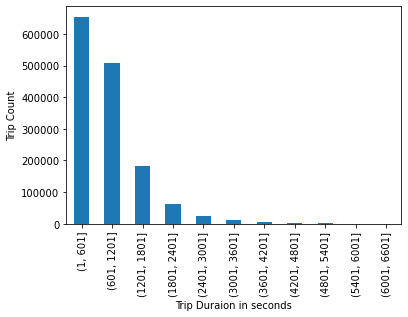

In [157]:
trainingData.trip_duration.groupby(pd.cut(trainingData.trip_duration, np.arange(1,7200,600))).count().plot(kind='bar')
plt.xlabel("Trip Duraion in seconds")
plt.ylabel("Trip Count")

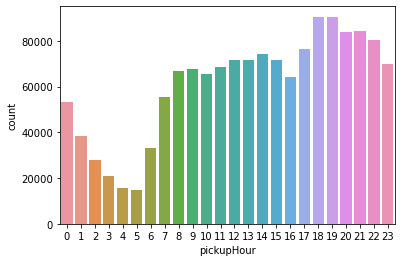

In [158]:
sns.countplot(trainingData.pickupHour)
# This a comlpletely natural plot. The number of pick ups per hour start to increase from 6 am
# as people start to head off to work. It is highest during eveing as people return, or go out for leisure.

In [165]:
# import importlib
# mpl_toolkits = importlib.import_module('mpl_toolkits')
# from mpl_toolkits.basemap import Basemap

def map_marker(set):
    # Import package for map
    from mpl_toolkits.basemap import Basemap
    plt.figure(figsize = (20,20))

    # Set the limits of the map to the minimum and maximum coordinates
    lat_min = data["pickup_latitude"].min() - .2
    lat_max = data["pickup_latitude"].max() + .2
    lon_min = data["pickup_longitude"].min() - .2
    lon_max = data["pickup_longitude"].max() + .2

    # Set the center of the map
    cent_lat = (lat_min + lat_max) / 2
    cent_lon = (lon_min + lon_max) / 2

    #Create the Basemap object with required params.
    map = Basemap(llcrnrlon=lon_min,
                  llcrnrlat=lat_min,
                  urcrnrlon=lon_max,
                  urcrnrlat=lat_max,
                  resolution='l',
                  projection='tmerc',
                  lat_0 = cent_lat,
                  lon_0 = cent_lon)

    #Style the map
    map.drawmapboundary()
    map.drawcoastlines()
    map.fillcontinents()
    map.drawcountries(linewidth=2)
    map.drawstates()


    #Fetch the long and lat in form of array
    long = np.array(data["pickup_longitude"])
    lat = np.array(data["pickup_latitude"])

    x, y = map(long, lat)
    map.plot(x, y,'ro', markersize=2, alpha=1)

    plt.show()

In [166]:
map_marker(trainingData)

KeyError: 'PROJ_LIB'